In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Read data
df = pd.read_csv("symptom2disease.csv")

df['symptom'] = df['text']
df.drop(columns=['text'], inplace=True)
df

,Unnamed: 0,label,symptom
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...,...
1195,295,diabetes,I'm shaking and trembling all over. I've lost ...
1196,296,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,297,diabetes,I regularly experience these intense urges and...
1198,298,diabetes,"I have trouble breathing, especially outside. ..."


In [21]:
# Data shape
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")

# Missing values
print(f"\nMissing values:\n{df.isnull().sum()}")

# Duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Unique diseases
print(f"\nNumber of unique diseases: {df['label'].nunique()}")
print(f"\nDisease distribution:\n{df['label'].value_counts()}")

Dataset shape: (1200, 3)

Column names: ['Unnamed: 0', 'label', 'symptom']

Data types:
Unnamed: 0     int64
label         object
symptom       object
dtype: object

Missing values:
Unnamed: 0    0
label         0
symptom       0
dtype: int64

Duplicate rows: 0

Number of unique diseases: 24

Disease distribution:
label
Psoriasis                          50
Varicose Veins                     50
peptic ulcer disease               50
drug reaction                      50
gastroesophageal reflux disease    50
allergy                            50
urinary tract infection            50
Malaria                            50
Jaundice                           50
Cervical spondylosis               50
Migraine                           50
Hypertension                       50
Bronchial Asthma                   50
Acne                               50
Arthritis                          50
Dimorphic Hemorrhoids              50
Pneumonia                          50
Common Cold                     


Text Statistics:
       text_length   word_count
count  1200.000000  1200.000000
mean    171.876667    30.725000
std      35.481506     6.707225
min      60.000000    12.000000
25%     147.750000    26.000000
50%     170.000000    30.000000
75%     193.000000    35.000000
max     317.000000    55.000000


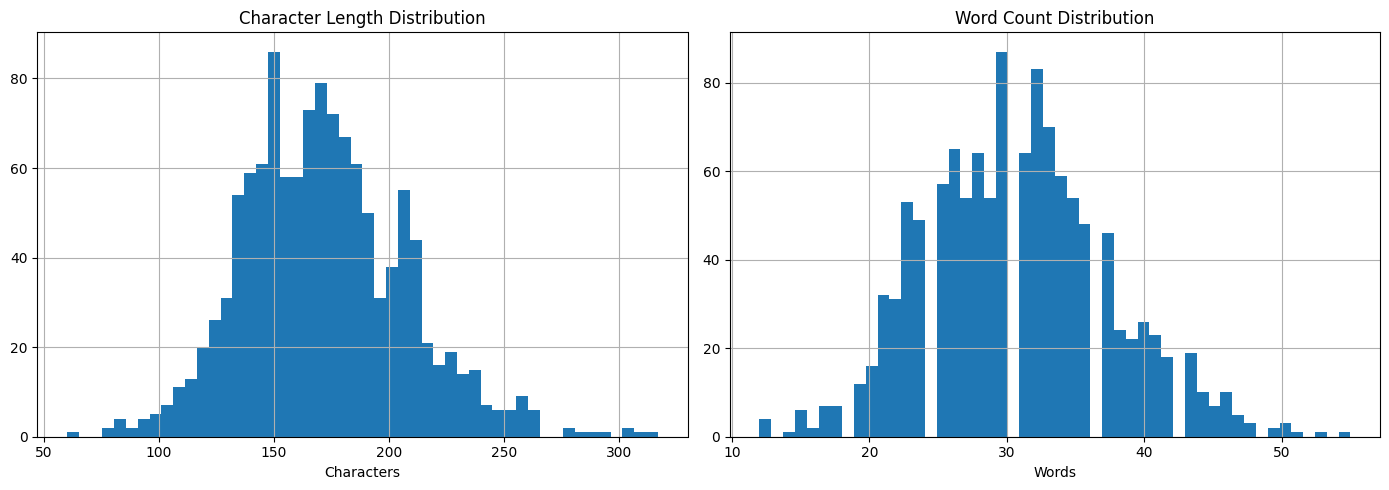

In [ ]:
# Visualize text length and word count
df['text_length'] = df['symptom'].str.len()
df['word_count'] = df['symptom'].str.split().str.len()

print(f"\nText Statistics:")
print(df[['text_length', 'word_count']].describe())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
df['text_length'].hist(bins=50, ax=axes[0])
axes[0].set_title('Character Length Distribution')
axes[0].set_xlabel('Characters')

df['word_count'].hist(bins=50, ax=axes[1])
axes[1].set_title('Word Count Distribution')
axes[1].set_xlabel('Words')
plt.tight_layout()
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
train_df, test_df = train_test_split(
    df, 
    test_size=0.2, 
    stratify=df['label'], 
    random_state=42
)

print(f"Train size: {len(train_df)}")
print(f"Test size: {len(test_df)}")

Train size: 960
Test size: 240


In [17]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-mpnet-base-v2')

label_embeddings = model.encode(df['symptom'])


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Save label mapping for later use
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"\nLabel mapping:\n{label_mapping}")


Label mapping:
{'Acne': np.int64(0), 'Arthritis': np.int64(1), 'Bronchial Asthma': np.int64(2), 'Cervical spondylosis': np.int64(3), 'Chicken pox': np.int64(4), 'Common Cold': np.int64(5), 'Dengue': np.int64(6), 'Dimorphic Hemorrhoids': np.int64(7), 'Fungal infection': np.int64(8), 'Hypertension': np.int64(9), 'Impetigo': np.int64(10), 'Jaundice': np.int64(11), 'Malaria': np.int64(12), 'Migraine': np.int64(13), 'Pneumonia': np.int64(14), 'Psoriasis': np.int64(15), 'Typhoid': np.int64(16), 'Varicose Veins': np.int64(17), 'allergy': np.int64(18), 'diabetes': np.int64(19), 'drug reaction': np.int64(20), 'gastroesophageal reflux disease': np.int64(21), 'peptic ulcer disease': np.int64(22), 'urinary tract infection': np.int64(23)}


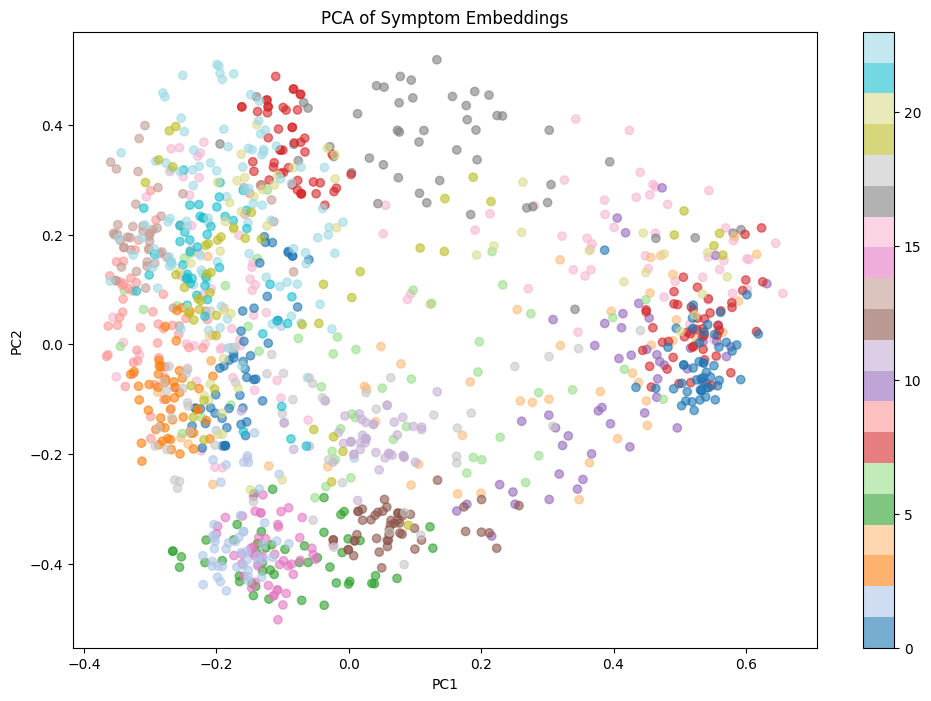

In [26]:
# Visualize embeddings with dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA
pca = PCA(n_components=2)
embeddings_2d_pca = pca.fit_transform(label_embeddings)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(embeddings_2d_pca[:, 0], embeddings_2d_pca[:, 1], 
                     c=df['label_encoded'], alpha=0.6, cmap='tab20')
plt.colorbar(scatter)
plt.title('PCA of Symptom Embeddings')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
